# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meraux
Processing Record 2 of Set 1 | marudi
City not found. Skipping...
Processing Record 3 of Set 1 | kone
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | seydi
Processing Record 8 of Set 1 | fort st. john
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | qarazhal
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | manokwari
Processing Record 22 of Set 1 | vila

In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,meraux,29.9330,-89.9498,30.99,69,0,2.57,US,1690430334
1,kone,-21.0595,164.8658,23.66,44,1,4.70,NC,1690430334
2,grytviken,-54.2811,-36.5092,0.93,99,100,5.41,GS,1690430269
3,enewetak,11.3474,162.3373,28.44,78,100,6.26,MH,1690430334
4,georgetown,5.4112,100.3354,31.96,82,20,2.57,MY,1690430335


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meraux,29.9330,-89.9498,30.99,69,0,2.57,US,1690430334
1,kone,-21.0595,164.8658,23.66,44,1,4.70,NC,1690430334
2,grytviken,-54.2811,-36.5092,0.93,99,100,5.41,GS,1690430269
3,enewetak,11.3474,162.3373,28.44,78,100,6.26,MH,1690430334
4,georgetown,5.4112,100.3354,31.96,82,20,2.57,MY,1690430335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

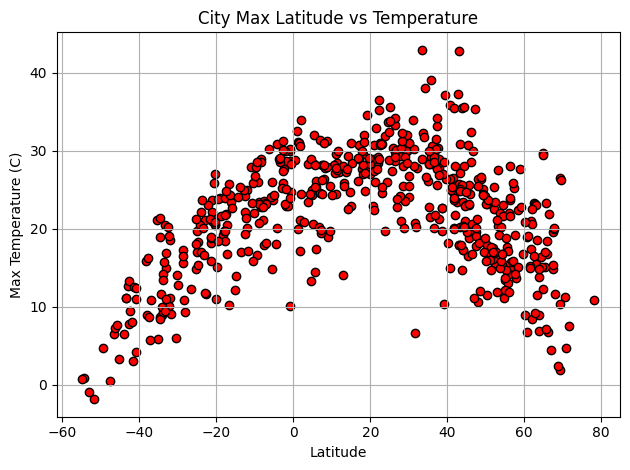

In [77]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],color="r", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature")
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

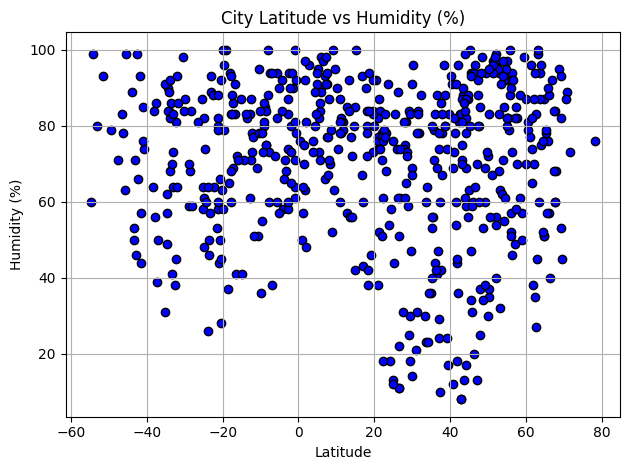

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],color="b", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

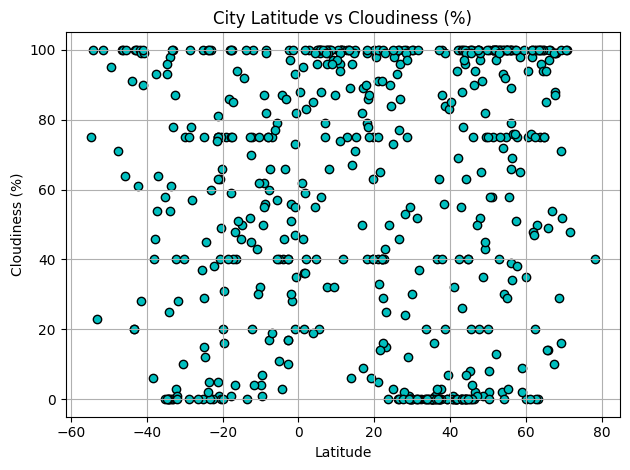

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],color="c", edgecolors='black')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

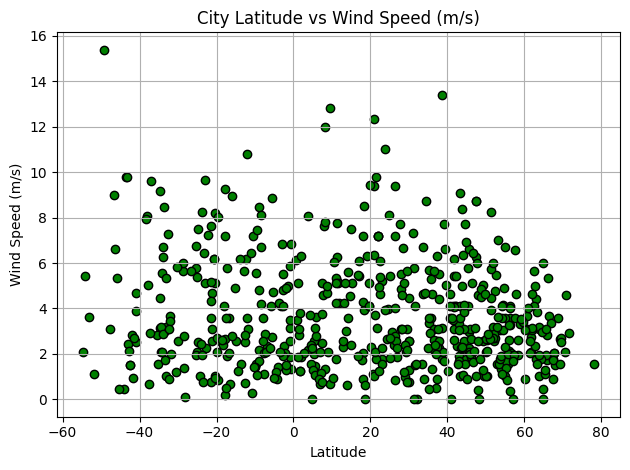

In [80]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],color="g", edgecolors='black')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y):
    
    # Perform linear regression using linregress() from scipy.stats
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Calculate the regression values (predicted y values) using the slope and intercept
    regress_values = x * slope + intercept

    # Create the equation of the regression line for plotting
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Calculate the Pearson correlation coefficient (r-value)
    r_value = rvalue

    # Plot the regression line
    plt.plot(x, regress_values, "r-")

    # Annotate the plot with the equation of the regression line and r-value
    annotation = f"{line_eq}"
    plt.annotate(annotation, (x.min(), y.max()), fontsize=12, color="red")
    print(f"R-Value: {r_value}")

    # Plot the original data points (scatter plot)
    plt.scatter(x, y)

    # Set x and y axis labels
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

    # Display the plot
    plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meraux,29.9330,-89.9498,30.99,69,0,2.57,US,1690430334
3,enewetak,11.3474,162.3373,28.44,78,100,6.26,MH,1690430334
4,georgetown,5.4112,100.3354,31.96,82,20,2.57,MY,1690430335
5,seydi,39.4816,62.9137,37.18,17,7,6.63,TM,1690430335
6,fort st. john,56.2499,-120.8529,14.94,94,100,4.12,CA,1690430335


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kone,-21.0595,164.8658,23.66,44,1,4.70,NC,1690430334
2,grytviken,-54.2811,-36.5092,0.93,99,100,5.41,GS,1690430269
7,west island,-12.1568,96.8225,24.99,78,75,10.80,CC,1690430272
10,coquimbo,-29.9533,-71.3436,12.85,87,75,2.57,CL,1690430336
11,port-aux-francais,-49.3500,70.2167,4.72,79,95,15.39,TF,1690430336


###  Temperature vs. Latitude Linear Regression Plot

R-Value: -0.5421607319017381


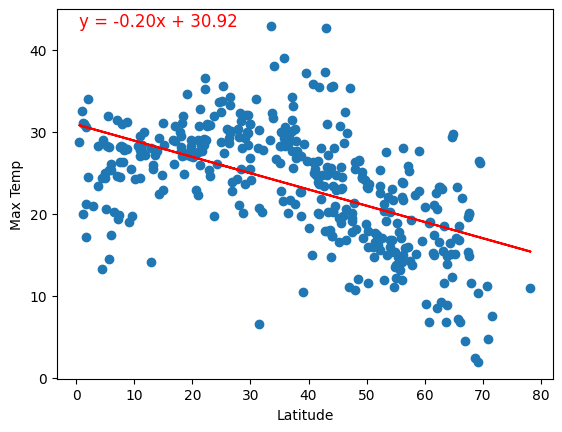

In [106]:
# Linear regression on Northern Hemisphere
linear_regression_plot( north_hemi_df["Lat"].rename("Latitude"), north_hemi_df["Max Temp"])


R-Value: 0.8252660388530102


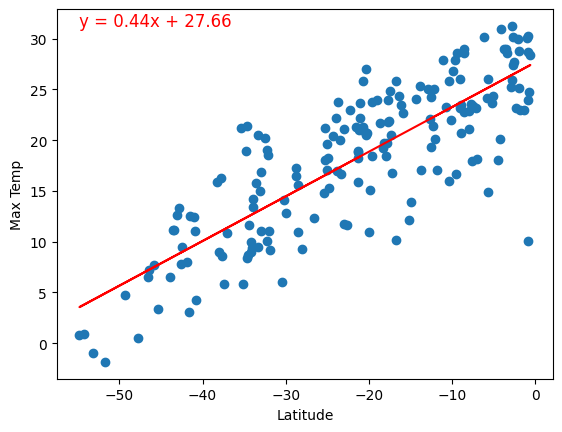

In [107]:
# Linear regression on Southern Hemisphere
linear_regression_plot(south_hemi_df["Lat"].rename("Latitude"), south_hemi_df["Max Temp"])


**Discussion about the linear relationship:** 
-There is a negative correlation between Temperature and Latitude in the Northern Hemisphere with an R-value of -0.61.
-There is a positive correlation between Temperature and Latitude in the Southern Hemisphere with an R-value of 0.79.

### Humidity vs. Latitude Linear Regression Plot

R-Value: -0.01961865645045455


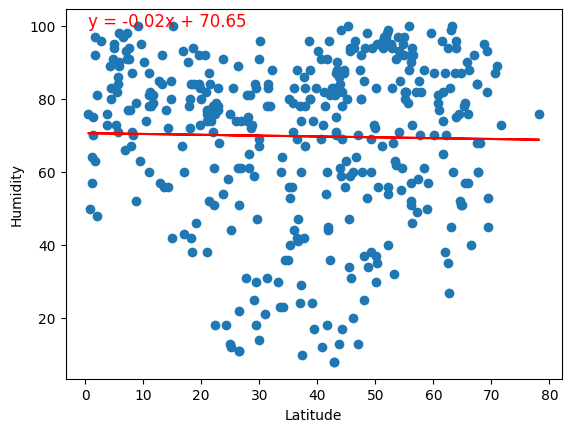

In [108]:
# Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"].rename("Latitude"), north_hemi_df["Humidity"])


R-Value: 0.08696903045584554


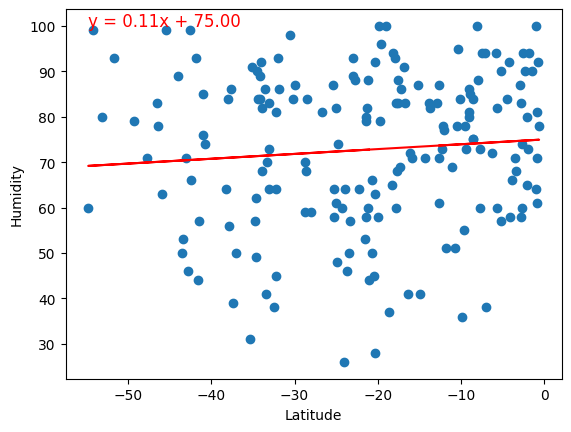

In [109]:
# Southern Hemisphere
linear_regression_plot(south_hemi_df["Lat"].rename("Latitude"), south_hemi_df["Humidity"])

**Discussion about the linear relationship:** 
-There is a very weak between Humidity and Latitude in the Northern Hemisphere with an R-value of -0.02.
-There is a very weak between Humidity and Latitude in the Southern Hemisphere with an R-value of 0.08.

### Cloudiness vs. Latitude Linear Regression Plot

R-Value: -0.050698109953232304


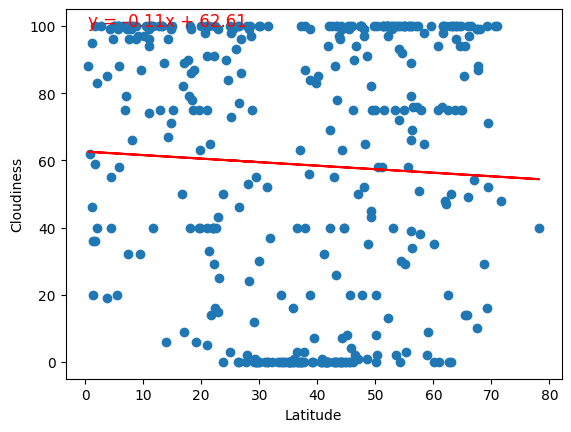

In [110]:
# Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"].rename("Latitude"), north_hemi_df["Cloudiness"])

R-Value: -0.09959672184926004


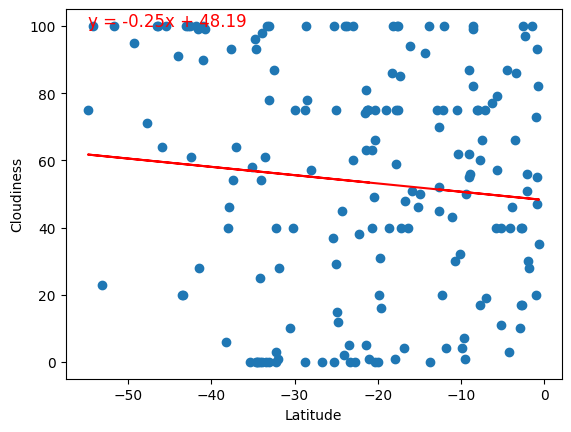

In [111]:
# Southern Hemisphere
linear_regression_plot(south_hemi_df["Lat"].rename("Latitude"), south_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** 
-There is a very weak negative correlation between Cloudiness and Latitude in the Northern Hemisphere with an R-value of -0.05.
-There is a very weak negative correlation between Cloudiness and Latitude in the Southern Hemisphere with an R-value of -0.09.

### Wind Speed vs. Latitude Linear Regression Plot

R-Value: -0.15662700901057247


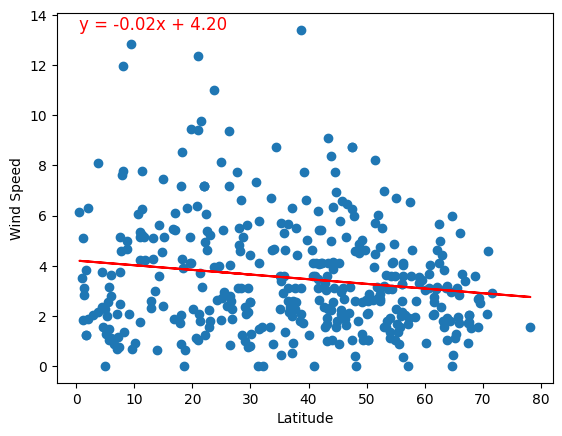

In [112]:
# Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"].rename("Latitude"), north_hemi_df["Wind Speed"])

R-Value: -0.10516730851138718


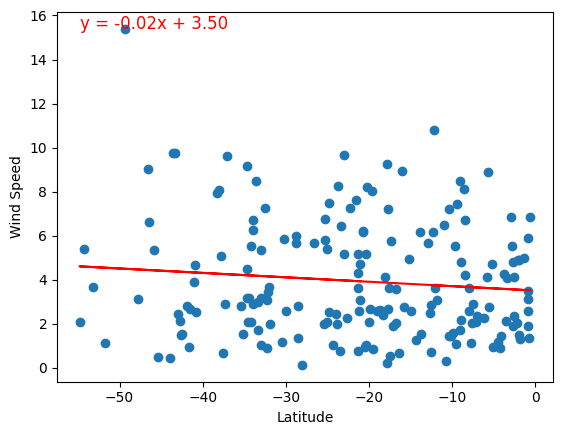

In [113]:
# Southern Hemisphere
linear_regression_plot(south_hemi_df["Lat"].rename("Latitude"), south_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** 
-There is a weak negative correlation between Cloudiness and Latitude in the Northern Hemisphere with an R-value of -0.15.
-There is a weak negative correlation between Cloudiness and Latitude in the Southern Hemisphere with an R-value of -0.10.